<a href="https://colab.research.google.com/github/irukah7/nishika/blob/main/yasai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
train = pd.read_csv('/content/drive/MyDrive/ml_compe/nishika/220808_yasai/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ml_compe/nishika/220808_yasai/test.csv')
weather = pd.read_csv('/content/drive/MyDrive/ml_compe/nishika/220808_yasai/weather.csv')
submission = pd.read_csv('/content/drive/MyDrive/ml_compe/nishika/220808_yasai/sample_submission.csv')

In [31]:
train

,kind,date,amount,mode_price,area
0,だいこん,20051107,201445,735.0,千葉
1,だいこん,20051108,189660,840.0,千葉_各地_青森
2,だいこん,20051110,218166,735.0,千葉_各地_青森
3,だいこん,20051111,182624,682.5,千葉_青森
4,だいこん,20051112,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,しめじ,20170526,17231,48.5,新潟_長野
97778,しめじ,20170527,17105,48.5,新潟_長野
97779,しめじ,20170529,12406,48.5,新潟_長野
97780,しめじ,20170530,12320,48.5,新潟_長野


In [32]:
test

,kind,date,area
0,だいこん,20220502,千葉_各地_青森
1,だいこん,20220506,千葉_各地_青森
2,だいこん,20220507,千葉_各地_青森
3,だいこん,20220509,千葉_各地_青森
4,だいこん,20220510,千葉_各地_青森
...,...,...,...
315,ミニトマト,20220526,各地_愛知
316,ミニトマト,20220527,各地_愛知
317,ミニトマト,20220528,各地_愛知
318,ミニトマト,20220530,各地_愛知


In [33]:
weather

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森
...,...,...,...,...,...,...,...,...,...,...
204315,20220426,21.3,23.6,2022/4/26 14:27,17.9,2022/4/26 04:17,2.5,0.0,89.0,東京
204316,20220427,23.0,27.7,2022/4/27 13:12,18.9,2022/4/28 0:00,0.5,1.6,79.0,東京
204317,20220428,16.9,21.1,2022/4/28 15:03,14.2,2022/4/28 22:40,0.0,5.5,57.0,東京
204318,20220429,12.9,16.4,2022/4/29 09:21,9.0,2022/4/29 23:55,40.0,0.2,86.0,東京


In [34]:
submission

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


In [36]:
train.isnull().sum()

kind          0
date          0
amount        0
mode_price    0
area          0
dtype: int64

In [37]:
test.isnull().sum()

kind    0
date    0
area    0
dtype: int64

In [38]:
weather.isnull().sum()

date               0
mean_temp        367
max_temp         367
max_temp_time    367
min_temp         368
min_temp_time    368
sum_rain         369
sun_time         432
mean_humid       398
area               0
dtype: int64

* train, test
    * 欠損値なしx
    * int型のデータ
* weather
    * max, min, mean, sumから始まるカラムに欠損値あり

In [44]:
print(f'trainデータの日付範囲: {train["date"].min()} ~ {train["date"].max()}')
print(f'testデータの日付範囲: {test["date"].min()} ~ {test["date"].max()}')

trainデータの日付範囲: 20051107 ~ 20220430
testデータの日付範囲: 20220502 ~ 20220531


In [68]:
# dateを年月に分ける
train['date'] = train['date'].astype('str')
train['year'] = train['date'].map(lambda x: x[:4])
train['yearmonth'] = train['date'].map(lambda x: x[:6])
train

,kind,date,amount,mode_price,area,year,yearmonth
0,だいこん,20051107,201445,735.0,千葉,2005,200511
1,だいこん,20051108,189660,840.0,千葉_各地_青森,2005,200511
2,だいこん,20051110,218166,735.0,千葉_各地_青森,2005,200511
3,だいこん,20051111,182624,682.5,千葉_青森,2005,200511
4,だいこん,20051112,220691,682.5,千葉_青森,2005,200511
...,...,...,...,...,...,...,...
97777,しめじ,20170526,17231,48.5,新潟_長野,2017,201705
97778,しめじ,20170527,17105,48.5,新潟_長野,2017,201705
97779,しめじ,20170529,12406,48.5,新潟_長野,2017,201705
97780,しめじ,20170530,12320,48.5,新潟_長野,2017,201705


In [86]:
year_data = train.groupby('year').sum()
year_data.reset_index(inplace=True)
yearmonth_data = train.groupby('yearmonth').sum()
yearmonth_data.reset_index(inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

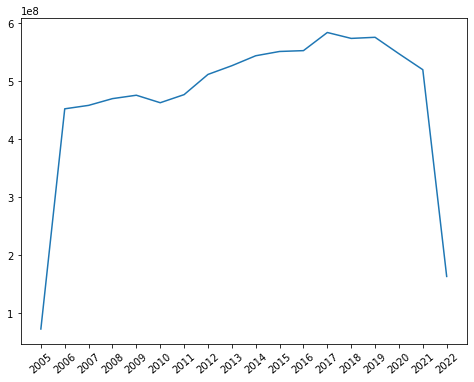

In [95]:
x = year_data.iloc[:, 0]
y =  year_data.iloc[:, 1]

plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.xticks(rotation=40)

,year,amount,mode_price
0,2005,72639092,1146868.75
1,2006,452230525,7333578.50
2,2007,458171223,6748936.75
3,2008,469792761,7516219.50
4,2009,475657357,7602399.50
5,2010,462726910,8414934.50
6,2011,476687335,7816559.25
7,2012,511517144,7790795.50
8,2013,526551095,7772812.00
9,2014,543703263,8099914.75
